In [6]:
import os
import zipfile
data_dir = './DevanagariHandwrittenCharacterDataset'
zip_ref = zipfile.ZipFile('/Users/rajarshighoshal/DevanagariClassification/DevanagariHandwrittenCharacterDataset.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [7]:
import numpy as np
import torch, torchvision

In [8]:
trainFolder = os.path.join(data_dir, 'Train')
testFolder = os.path.join(data_dir, 'Test')

In [9]:
transform = torchvision.transforms.Compose([torchvision.transforms.Grayscale(num_output_channels=1),
                                            torchvision.transforms.ToTensor()])

# load train datasets
train_dataset = torchvision.datasets.ImageFolder(root=trainFolder, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=20, num_workers=0, shuffle=True)

# load test datasets
test_dataset = torchvision.datasets.ImageFolder(root=testFolder, transform=transform)
test_loader = torch.utils.data.DataLoader(train_dataset,batch_size=20,num_workers=0,shuffle=True)

classes = os.listdir(trainFolder)

## visualise a batch of training data

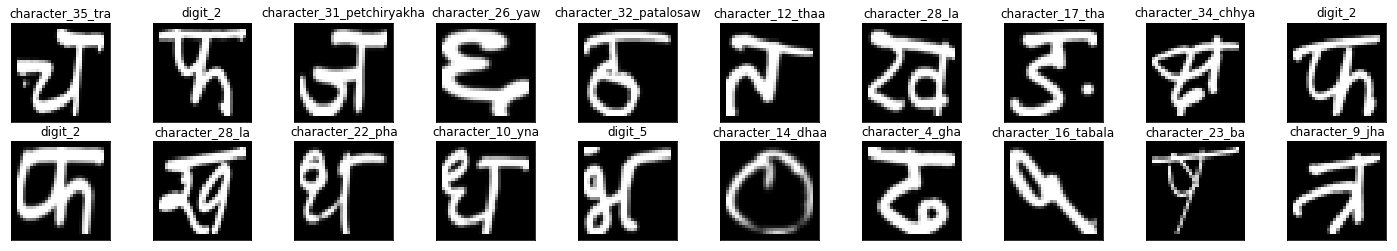

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(classes[labels[idx]])

## View one image in more detail

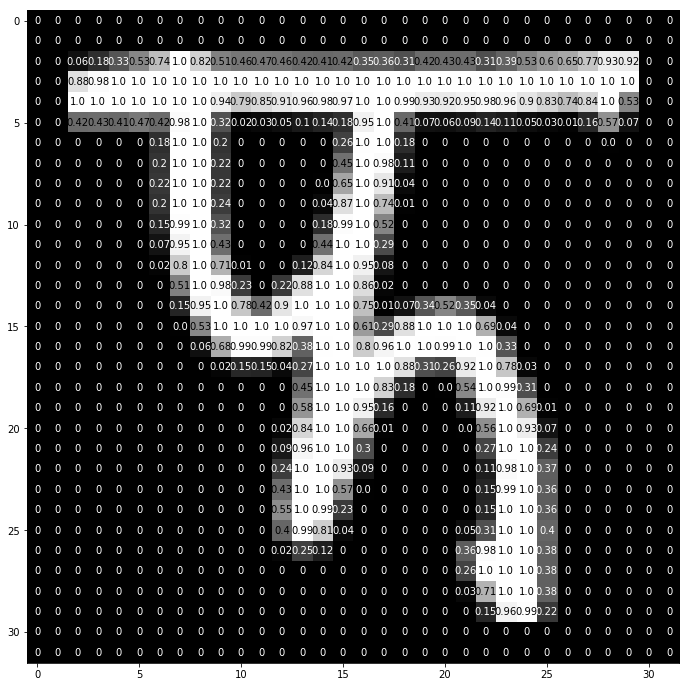

In [11]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [12]:
from shutil import rmtree
rmtree(data_dir)